# Forecasting USD to IDR June 2020 - June 2021
# Autoregressive Integrated Moving Average (ARIMA)

In [155]:
from statsmodels.tsa.stattools import adfuller
import warnings
import itertools
warnings.filterwarnings("ignore")
import numpy as np 
import pandas as pd
from pandas import date_range
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose 
import datetime
from pylab import rcParams

plt.style.use("ggplot")

In [156]:
df = pd.read_csv("USD_IDR Historical Data.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df[:1410]
df = df.replace(',','', regex = True)   #Mengatasi comma style number
df = df.replace('%','', regex = True)   #Mengatasi kolom change berlabel %
df.set_index("Date", inplace = True)
df.sort_index(inplace = True)
df = df[["Price"]]
df = df[["Price"]].astype(float)   #mengubah type data menjadi float
# df

In [157]:
df

,Price
Date,
2015-01-01,12385.0
2015-01-02,12542.5
2015-01-05,12627.5
2015-01-06,12657.5
2015-01-07,12738.5
...,...
2020-06-02,14415.0
2020-06-03,14095.0
2020-06-04,14095.0


In [158]:
y = df['Price'].resample('1M').mean()

In [159]:
y

Date
2015-01-31    12572.181818
2015-02-28    12760.675000
2015-03-31    13066.909091
2015-04-30    12946.159091
2015-05-31    13132.023810
                  ...     
2020-02-29    13767.125000
2020-03-31    15179.119048
2020-04-30    15710.595238
2020-05-31    14854.687500
2020-06-30    14072.000000
Freq: M, Name: Price, Length: 66, dtype: float64

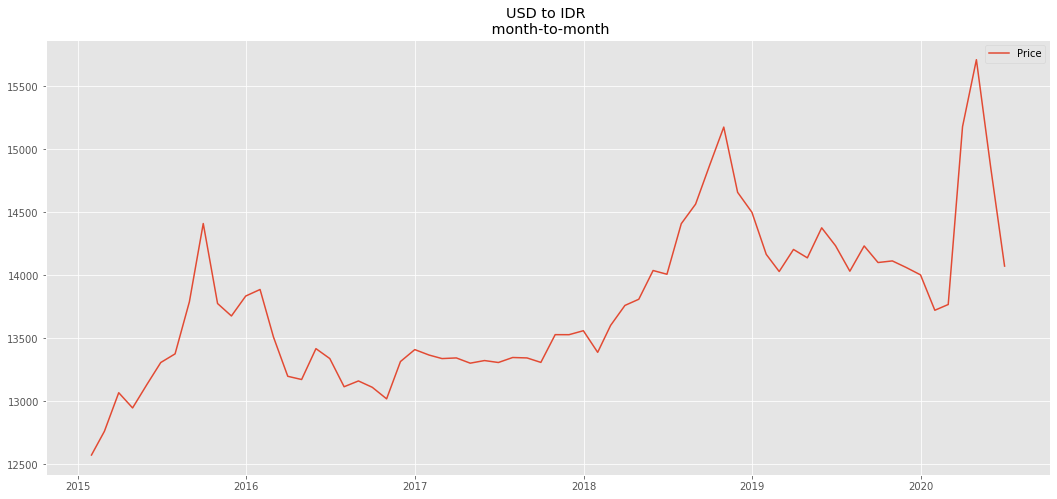

In [215]:
plt.plot(y, label = "Price")
plt.title("USD to IDR \n month-to-month")
plt.legend()

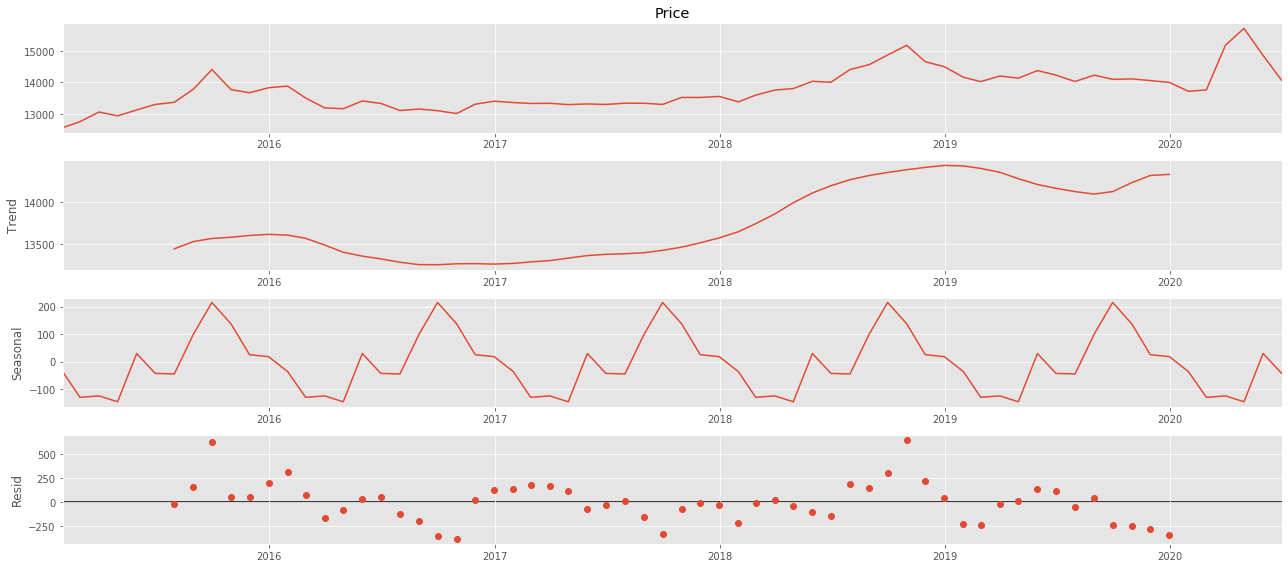

In [199]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()

In [200]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [182]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1425.6642693795213
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1132.0659500654992
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:842.1127036588302
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:656.2427989497903
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:858.2644673842375
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:834.6599462491471
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:671.1860323759686
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:647.5169683823286
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1360.0032281131341
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1098.4449674955442
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:781.1525717080818
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:602.3006227626254
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:811.7098565891622
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:769.3647589088583
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:627.9446555736578
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:598.4630535527131
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:922.1268178546809
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:750.1365620594266
ARIMA(

### ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:569.5266805249596 is the lowest AIC. That is the optimal model

In [183]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Price   No. Observations:                   66
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -279.763
Date:                            Fri, 12 Jun 2020   AIC                            569.527
Time:                                    06:14:24   BIC                            577.844
Sample:                                01-31-2015   HQIC                           572.511
                                     - 06-30-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3582      0.202     -1.774      0.076      -0.754       0.038
ma.L1          1.0000      0.163   

Text(0.5, 1.0, 'Correlogram')

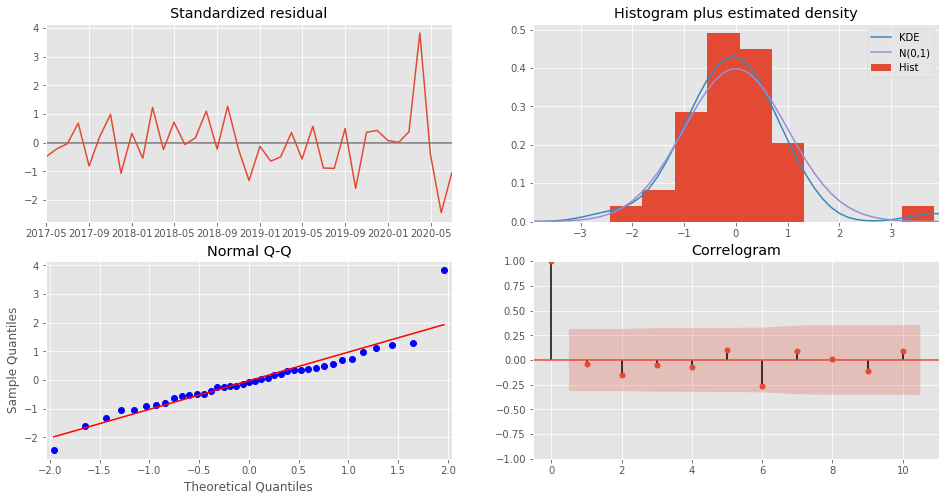

In [184]:
results.plot_diagnostics(figsize=(16, 8))
plt.title("Correlogram")

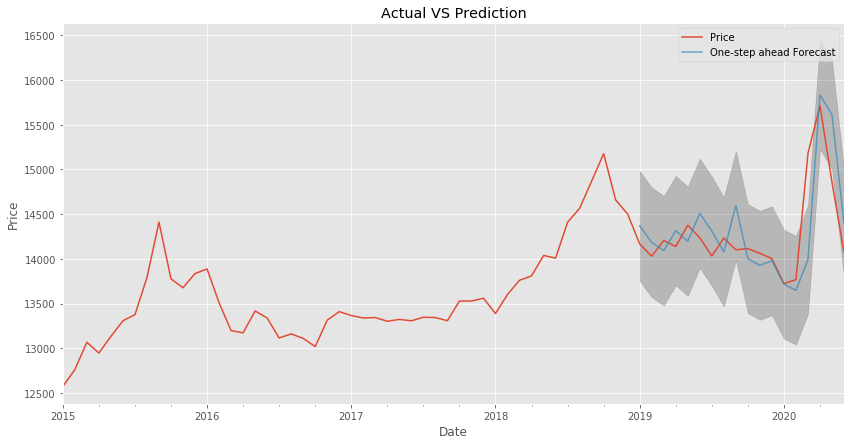

In [212]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-31'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2015':].plot(label='Price')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.title("Actual VS Prediction")
plt.legend()

In [193]:
y_forecasted = pred.predicted_mean
y_truth = y['2020-01-31':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 352805.01


In [194]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 593.97


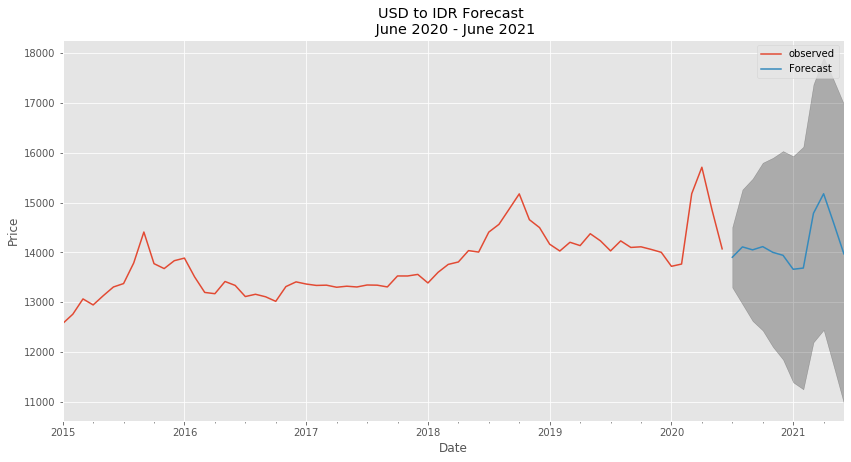

In [213]:
pred_uc = results.get_forecast(steps=12)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.title("USD to IDR Forecast \n June 2020 - June 2021")
plt.legend()